## Using COCO-pretrained module for detecting objects in images

Adapted from Tensorflow's <a herf='https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb'>Object Detection Tutorial</a>

### Import Libraries

In [1]:
#Import libraries..
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Setup Environment

In [2]:
# This is needed to display the images.
%matplotlib inline

### Import Models

The models were downloaded from: <a href="https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md">Tensorflow's Object Detection API</a>  

In [3]:
#fast, MAP:21
MODEL_MOBILENET = '../models/ssd_mobilenet_v1_coco.pb'

#fast, MAP:24
MODEL_INCEPTION = '../models/ssd_inception_v2_coco.pb'

#medium, MAP:30
MODEL_MEDIUM = '../models/faster_rcnn_resnet101_coco.pb'

#slow, MAP:37
MODEL_MOST_ACCURATE = '../models/faster_rcnn_inception_resnet_v2_atrous_coco.pb'

#very slow, MAP:43
MODEL_HIGH = "../models/faster_rcnn_nas_coco.pb"

### Load a (frozen) model

In [4]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(MODEL_MOST_ACCURATE, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

### Load labels

In [5]:
#Import helper function
from utils import create_label_map 

#Set #label and path to labels 
LABELS_PATH = './data/mscoco_label_map.pbtxt'
NUM_CLASSES = 90

#Creating mapping from integer index --> String Name
label_map = create_label_map.load_labelmap(LABELS_PATH)
print (label_map)
    
#label_map = label_map_util.load_labelmap(LABELS_PATH)
#categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
#category_index = label_map_util.create_category_index(categories)

{1: {'id': 1, 'name': 'person'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'car'}, 4: {'id': 4, 'name': 'motorcycle'}, 5: {'id': 5, 'name': 'airplane'}, 6: {'id': 6, 'name': 'bus'}, 7: {'id': 7, 'name': 'train'}, 8: {'id': 8, 'name': 'truck'}, 9: {'id': 9, 'name': 'boat'}, 10: {'id': 10, 'name': 'traffic light'}, 11: {'id': 11, 'name': 'fire hydrant'}, 13: {'id': 13, 'name': 'stop sign'}, 14: {'id': 14, 'name': 'parking meter'}, 15: {'id': 15, 'name': 'bench'}, 16: {'id': 16, 'name': 'bird'}, 17: {'id': 17, 'name': 'cat'}, 18: {'id': 18, 'name': 'dog'}, 19: {'id': 19, 'name': 'horse'}, 20: {'id': 20, 'name': 'sheep'}, 21: {'id': 21, 'name': 'cow'}, 22: {'id': 22, 'name': 'elephant'}, 23: {'id': 23, 'name': 'bear'}, 24: {'id': 24, 'name': 'zebra'}, 25: {'id': 25, 'name': 'giraffe'}, 27: {'id': 27, 'name': 'backpack'}, 28: {'id': 28, 'name': 'umbrella'}, 31: {'id': 31, 'name': 'handbag'}, 32: {'id': 32, 'name': 'tie'}, 33: {'id': 33, 'name': 'suitcase'}, 34: {'id': 34, 'name'

### Helper to load image into numpy array

In [6]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

### Helper to get objects detected from label_map

In [7]:
def query_map(label_map, classes):
    class_names = []
    for c in classes:
        if c in label_map.keys():
                label = label_map[c]['name']
        else:
                label = 'N/A'
        class_names.append(label) 
    return class_names    

### Detection

In [8]:
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.

import os 
import timeit
from utils import visualization_utils as vis_util


PATH_TO_TEST_IMAGES_DIR = './testImages'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(13, 14)]

# Size, in inches, of the output images.
IMAGE_SIZE = (8, 4)

Time to open image:  0.022882887999003287
Time to load image:  0.5859855150047224
Time to expand dims:  1.8878003174904734e-05
Time to pass through model:  41.11624413199752
{'id': 65, 'name': 'bed'}
{'id': 64, 'name': 'potted plant'}
{'id': 64, 'name': 'potted plant'}
{'id': 86, 'name': 'vase'}
{'id': 63, 'name': 'couch'}
{'id': 62, 'name': 'chair'}
{'id': 63, 'name': 'couch'}
{'id': 51, 'name': 'bowl'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id': 1, 'name': 'person'}
{'id

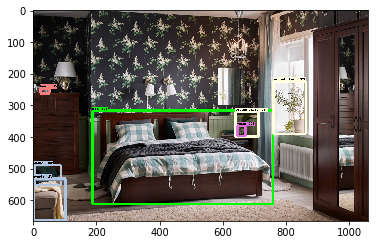

In [9]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            start = timeit.default_timer()
            image = Image.open(image_path)
            stop = timeit.default_timer()
            print ("Time to open image: ", stop-start)
            
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            start = timeit.default_timer()
            image_np = load_image_into_numpy_array(image)
            stop = timeit.default_timer()
            print ("Time to load image: ", stop-start)
            
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            start = timeit.default_timer()
            image_np_expanded = np.expand_dims(image_np, axis=0)
            stop = timeit.default_timer()
            print ("Time to expand dims: ", stop-start)
            
            # Actual detection
            start = timeit.default_timer()
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            
            ##### OBJECT DETECTION COMPLETE
            stop = timeit.default_timer()
            print ("Time to pass through model: ", stop-start)
            
            
            start = timeit.default_timer()
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                label_map,
                use_normalized_coordinates=True,
                line_thickness=8)
            start = timeit.default_timer()
            for item in np.squeeze(classes).astype(np.int32):
                print(label_map[item])  
            print(np.squeeze(scores))
            #plt.figure(figsize=IMAGE_SIZE)
            plt.figure()
            plt.imshow(image_np)
            plt.imsave(arr=image_np, fname='bedroom.jpg')



NOTE: mobilenet takes ~5s
    ACCURATE takes ~40s